## Investment Risk Management

In [1]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Fetch historical market data for FB, AAPL, AMZN, NFLX, GOOGL, S&P 500
start_date = "2020-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
close_price = yf.download("META AAPL AMZN NFLX GOOGL ^GSPC", start=start_date, end=end_date, auto_adjust=True)['Close']
close_price

[*********************100%***********************]  6 of 6 completed


Ticker,AAPL,AMZN,GOOGL,META,NFLX,^GSPC
Date,,,,,,
2020-01-02,72.538513,94.900497,67.965225,208.494659,329.809998,3257.850098
2020-01-03,71.833298,93.748497,67.609688,207.391495,325.899994,3234.850098
2020-01-06,72.405685,95.143997,69.411766,211.297440,335.829987,3246.280029
2020-01-07,72.065163,95.343002,69.277679,211.754593,330.750000,3237.179932
2020-01-08,73.224403,94.598503,69.770782,213.901352,339.260010,3253.050049
...,...,...,...,...,...,...
2025-09-22,256.079987,227.630005,252.529999,765.159973,1227.369995,6693.750000
2025-09-23,254.429993,220.710007,251.660004,755.400024,1218.469971,6656.919922
2025-09-24,252.309998,220.210007,247.139999,760.659973,1203.949951,6637.970215


In [3]:
# Handle missing data by backfilling and setting business day frequency
close_price.index = pd.to_datetime(close_price.index)
close_price.sort_index(inplace=True)
close_price = close_price.asfreq('B').bfill()

Plot closing prices from 2020-01-02 to 2025-09-26


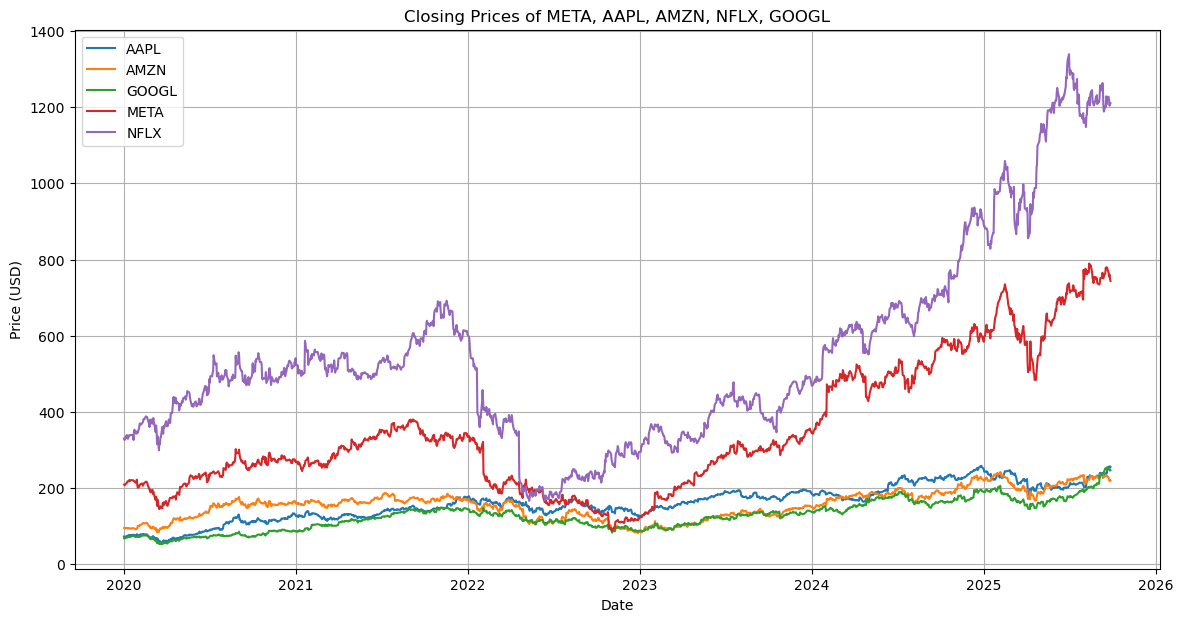

In [4]:
# Plot closing prices except S&P 500
print(f'Plot closing prices from {close_price.index.min().date()} to {close_price.index.max().date()}')
plt.figure(figsize=(14, 7))
for column in close_price.columns:
    if column != '^GSPC':
        plt.plot(close_price.index, close_price[column], label=column)
plt.title('Closing Prices of META, AAPL, AMZN, NFLX, GOOGL')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [5]:
# Using Plotly for interactive plots
import plotly.graph_objects as go

fig = go.Figure()
for column in close_price.columns:
    if column != '^GSPC':
        fig.add_trace(go.Scatter(x=close_price.index, y=close_price[column], mode='lines', name=column))
fig.update_layout(title='Closing Prices of META, AAPL, AMZN, NFLX, GOOGL',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)')
fig.show()

Plot normalized prices from 2022-01-01 to 2025-12-31


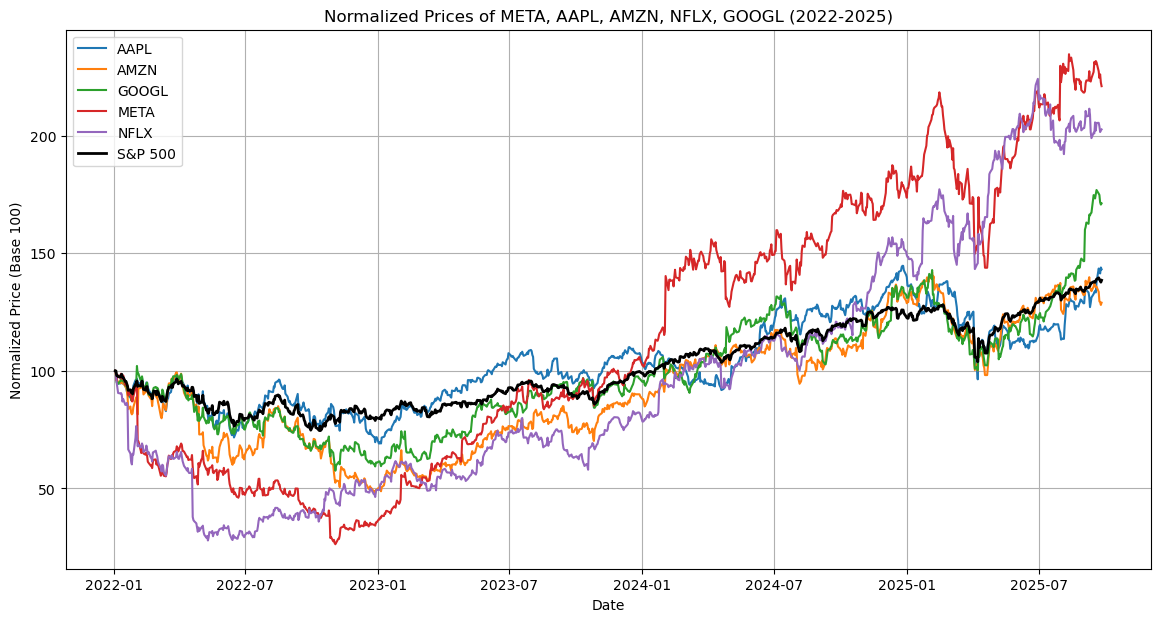

In [6]:
# Normalize prices to start at 100
start_date = pd.to_datetime('01-01-2022', format='%d-%m-%Y')
end_date = pd.to_datetime('31-12-2025', format='%d-%m-%Y')
close_price_filtered = close_price[(close_price.index >= start_date) & (close_price.index <= end_date)]

normalized_price = close_price_filtered / close_price_filtered.iloc[0] * 100
print(f'Plot normalized prices from {start_date.date()} to {end_date.date()}')
plt.figure(figsize=(14, 7))
for column in normalized_price.columns:
    if column != '^GSPC':  # Exclude S&P 500
        plt.plot(normalized_price.index, normalized_price[column], label=column)
plt.plot(normalized_price.index, normalized_price['^GSPC'], label='S&P 500', linestyle='-', color='black', linewidth=2)
plt.title('Normalized Prices of META, AAPL, AMZN, NFLX, GOOGL (2022-2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.legend()
plt.grid()
plt.show()


### Daily Returns, Monthly and Annualized Standard Deviation (Volatility), Beta Calculation

In [7]:
# Calculate daily returns
close_return = (close_price)/close_price.shift(1) - 1
close_return.dropna(inplace=True)
close_return

Ticker,AAPL,AMZN,GOOGL,META,NFLX,^GSPC
Date,,,,,,
2020-01-03,-0.009722,-0.012139,-0.005231,-0.005291,-0.011855,-0.007060
2020-01-06,0.007968,0.014886,0.026654,0.018834,0.030469,0.003533
2020-01-07,-0.004703,0.002092,-0.001932,0.002164,-0.015127,-0.002803
2020-01-08,0.016086,-0.007809,0.007118,0.010138,0.025729,0.004902
2020-01-09,0.021241,0.004799,0.010498,0.014311,-0.010611,0.006655
...,...,...,...,...,...,...
2025-09-22,0.043096,-0.016632,-0.008598,-0.016321,0.000326,0.004410
2025-09-23,-0.006443,-0.030400,-0.003445,-0.012755,-0.007251,-0.005502
2025-09-24,-0.008332,-0.002265,-0.017961,0.006963,-0.011917,-0.002847


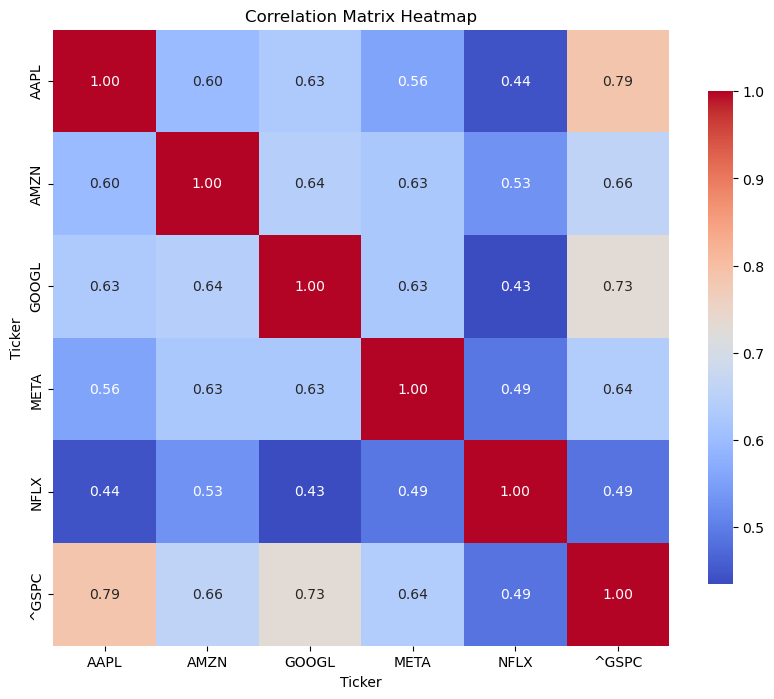

Correlation with S&P 500:
AAPL correlation with S&P 500: 0.79
AMZN correlation with S&P 500: 0.66
GOOGL correlation with S&P 500: 0.73
META correlation with S&P 500: 0.64
NFLX correlation with S&P 500: 0.49


In [8]:
# Heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
correlation_matrix = close_return.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix Heatmap")
plt.show()
print("Correlation with S&P 500:")
for column in close_return.columns:
    if column != '^GSPC':
        corr_value = correlation_matrix.at[column, '^GSPC']
        print(f"{column} correlation with S&P 500: {corr_value:.2f}")

This analysis involves calculating the daily returns of selected stocks, their monthly and annualized standard deviation (volatility), and the correlation of these stocks with the S&P 500 index. The stocks analyzed include Meta Platforms Inc. (META), Apple Inc. (AAPL), Amazon.com Inc. (AMZN), Netflix Inc. (NFLX), and Alphabet Inc. (GOOGL). The correlation values indicate how closely the stock returns move in relation to the S&P 500 index. A value closer to 1 suggests a strong positive correlation, meaning the stock tends to move in the same direction as the index. A value closer to 0 indicates little to no correlation, while a negative value would suggest an inverse relationship.
The highest correlation with the S&P 500 is observed in AAPL (Apple Inc.) with a correlation coefficient of 0.79, indicating that Apple's stock returns tend to move closely in line with the overall market represented by the S&P 500 index.

In [9]:
# Total growth (geometric mean)
geom = (1 + close_return.dropna()).prod()
# Calculate daily return
daily_return = geom**(1/len(close_return)) - 1

# Monthly equivalent return
months = (close_price.index[-1] - close_price.index[0]).days / 30.44
monthly_return = geom**(1/months) - 1

# Annualize the return (CAGR: Compound Annual Growth Rate)
years = (close_price.index[-1] - close_price.index[0]).days / 365.25
annual_return = geom**(1/years) - 1

print("Geometric Mean of Daily Returns (%):")
print(daily_return * 100)
print("Monthly Return (%):")
print(monthly_return * 100)
print("Annualized Return (%):")
print(annual_return * 100)

Geometric Mean of Daily Returns (%):
Ticker
AAPL     0.084190
AMZN     0.056152
GOOGL    0.086169
META     0.085049
NFLX     0.086960
^GSPC    0.047645
dtype: float64
Monthly Return (%):
Ticker
AAPL     1.846953
AMZN     1.228277
GOOGL    1.890756
META     1.865970
NFLX     1.908287
^GSPC    1.041277
dtype: float64
Annualized Return (%):
Ticker
AAPL     24.557152
AMZN     15.775572
GOOGL    25.201468
META     24.836500
NFLX     25.460191
^GSPC    13.235202
dtype: float64


In [10]:
# MAANG Portfolio
maang_weights = {
    'META': 0.2,
    'AAPL': 0.2,
    'AMZN': 0.2,
    'NFLX': 0.2,
    'GOOGL': 0.2
}
# Calculate weighted returns
monthly_return_weighted = monthly_return * pd.Series(maang_weights)
portfolio_monthly_return = monthly_return_weighted.sum()
print("MAANG Portfolio Monthly Return:")
print(f"{portfolio_monthly_return * 100:.2f}%")


MAANG Portfolio Monthly Return:
1.75%


Monthly Standard Deviation (Volatility) (%):
Ticker
AAPL      9.158792
AMZN     10.159638
GOOGL     9.236322
META     12.538573
NFLX     12.517565
^GSPC     6.016985
dtype: float64
Annualized Standard Deviation (Volatility) (%):
Ticker
AAPL     31.726986
AMZN     35.194019
GOOGL    31.995557
META     43.434891
NFLX     43.362117
^GSPC    20.843446
dtype: float64


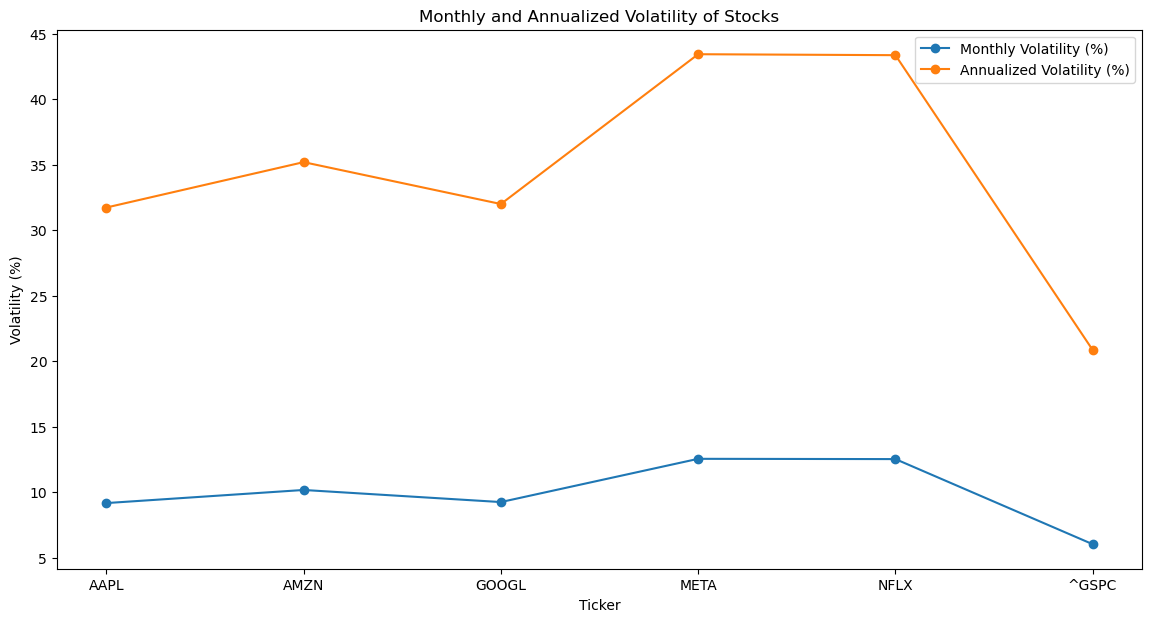

In [11]:
# Monthly standard deviation (volatility)
monthly_std = close_return.std() * np.sqrt(21)  # Assuming 21 trading days in a month
print("Monthly Standard Deviation (Volatility) (%):")
print(monthly_std * 100)
# Annualized standard deviation (volatility)
annual_std = close_return.std() * np.sqrt(252)  # Assuming 252 trading days in a year
print("Annualized Standard Deviation (Volatility) (%):")
print(annual_std * 100)
# Plot monthly and annualized volatility
plt.subplots(figsize=(14, 7))
plt.plot(monthly_std.index, monthly_std * 100, marker='o', label='Monthly Volatility (%)')
plt.plot(annual_std.index, annual_std * 100, marker='o', label='Annualized Volatility (%)')
plt.title('Monthly and Annualized Volatility of Stocks')
plt.xlabel('Ticker')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

Monthly Standard Deviation (Volatility) (%) this is a measure of how much the returns of an investment vary on a monthly basis. A higher standard deviation indicates greater volatility and risk.

In [12]:
# Beta Calculation compared to S&P 500 (systematic risk)
beta = {}
sp500_return = close_return['^GSPC']
for column in close_return.columns:
    if column != '^GSPC':
        covariance = np.cov(close_return[column], sp500_return)[0][1]
        variance = np.var(sp500_return)
        beta[column] = covariance / variance
print("Beta compared to S&P 500:")
for stock, b in beta.items():
    print(f"{stock}: {b:.2f}")

Beta compared to S&P 500:
AAPL: 1.20
AMZN: 1.11
GOOGL: 1.12
META: 1.33
NFLX: 1.01


Investors use beta to understand how much risk they are taking on with a particular stock compared to the market. A beta greater than 1 indicates that the stock is more volatile than the market, while a beta less than 1 indicates that the stock is less volatile. For example, META has a beta of 1.33, suggesting it is more volatile than the S&P 500, while NFLX has a beta of 1.01, indicating it has similar volatility to the market.

In [13]:
# Beta portion of MAANG Portfolio
portfolio_beta = sum(beta[stock] * weight for stock, weight in maang_weights.items())
print(f"MAANG Portfolio Beta: {portfolio_beta:.2f}")

MAANG Portfolio Beta: 1.15


The beta of the MAANG portfolio is calculated as a weighted average of the individual betas of the stocks in the portfolio, using their respective weights. A portfolio beta of 1.15 indicates that the MAANG portfolio is expected to be 15% more volatile than the S&P 500 index. This means that if the S&P 500 moves up or down by 1%, the MAANG portfolio is expected to move up or down by approximately 1.15%. If S&P 500 increases by 10%, the MAANG portfolio is expected to increase by 11.5%, and if S&P 500 decreases by 10%, the MAANG portfolio is expected to decrease by 11.5%.

The Beta of the MAANG portfolio is 1.15, indicating that the portfolio should earn a return 15% higher than the market return, assuming the market return is positive. This also suggests that the portfolio carries more risk than the market. 

Under CAPM, investors expect to be compensated for taking on additional risk, so a higher beta typically corresponds to a higher expected return. However, it's important to note that a higher beta also means greater volatility, which can lead to larger fluctuations in the portfolio's value.

### Treynor Ratio Calculation

The Treynor Ratio is a measure of the risk-adjusted return of an investment portfolio. It is calculated by subtracting the risk-free rate from the portfolio's return and then dividing that result by the portfolio's beta. The formula for the Treynor Ratio is:

Treynor Ratio = (Portfolio Return - Risk-Free Rate) / Portfolio Beta

In [14]:
# Risk-Free Rate (3-months US Treasury yield from yf)
ticker = yf.Ticker("^IRX")
risk_free_rate = ticker.history(period="1d")['Close'].iloc[-1] / 100  # Convert to decimal
print(f"Risk-Free Rate (3-months US Treasury yield): {risk_free_rate * 100:.2f}%")
# Convert annual risk-free rate to monthly
risk_free_rate_monthly = (1 + risk_free_rate)**(1/12) - 1
print(f"Monthly Risk-Free Rate: {risk_free_rate_monthly * 100:.4f}%")

Risk-Free Rate (3-months US Treasury yield): 3.86%
Monthly Risk-Free Rate: 0.3161%


In [ ]:
# Calculate Treynor for each stock
monthly_treynor = (monthly_return - risk_free_rate_monthly) / pd.Series(beta)
monthly_treynor.dropna(inplace=True)
print(" Monthly Treynor Ratio for each stock (%):")
print(monthly_treynor * 100)


 Monthly Treynor Ratio for each stock (%):
AAPL     1.279011
AMZN     0.819218
GOOGL    1.403512
META     1.169362
NFLX     1.574931
dtype: float64


In [16]:
# Calculate Treynor for MAANG Portfolio
maang_treynor = (portfolio_monthly_return - risk_free_rate_monthly) / portfolio_beta
print(f"MAANG Portfolio Treynor Ratio: {maang_treynor * 100:.4f}%")

MAANG Portfolio Treynor Ratio: 1.2411%


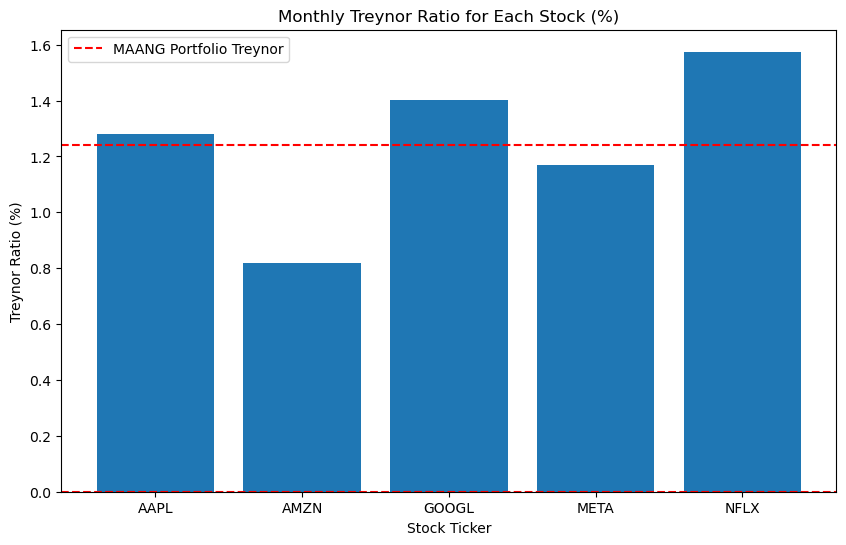

In [26]:
# Plot Treynor ratios
plt.figure(figsize=(10, 6))
plt.bar(monthly_treynor.index, monthly_treynor * 100)
plt.title('Monthly Treynor Ratio for Each Stock (%)')
# add MAANG Portfolio Treynor like a horizontal line
plt.axhline(maang_treynor * 100, color='red', linestyle='--', label='MAANG Portfolio Treynor')
plt.legend()
plt.xlabel('Stock Ticker')
plt.ylabel('Treynor Ratio (%)')
plt.axhline(0, color='red', linestyle='--')
plt.show()

Which higher Treynor ratio indicates better risk-adjusted performance. It shows how much excess return you are receiving for the extra volatility that you endure for holding a riskier asset. At here, NFLX has the highest Treynor ratio of 1.5755, indicating that it provides the best return for its level of systematic risk among the stocks analyzed. The lowest Treynor ratio is observed in AMZN (Amazon.com Inc.) with a value of 0.8197, suggesting that it provides the least return for its level of systematic risk among the stocks analyzed.

The Treynor ratio of the MAANG portfolio is 1.2416%, indicating that for each unit of systematic risk (as measured by beta) taken on by the portfolio, it generates an excess return of approximately 1.2416% over the risk-free rate. This suggests that the MAANG portfolio is providing a good return relative to its level of market risk, making it an attractive option for investors seeking to optimize their risk-adjusted returns.

### Value at Risk (VaR)

In [27]:
# Value at Risk (VaR)
confidence_level_95 = 0.95
confidence_level_99 = 0.99
# Monthly VaR at 95% confidence level
var_95 = close_return.quantile(1 - confidence_level_95) * np.sqrt(21)  # Monthly VaR
# Monthly VaR at 99% confidence level
var_99 = close_return.quantile(1 - confidence_level_99) * np.sqrt(21)  # Monthly VaR
# Display VaR results
print("Monthly Value at Risk (VaR) at 95% confidence level (%):")
print(var_95 * 100)
print("Monthly Value at Risk (VaR) at 99% confidence level (%):")
print(var_99 * 100)

Monthly Value at Risk (VaR) at 95% confidence level (%):
Ticker
AAPL    -14.066414
AMZN    -15.036735
GOOGL   -14.138840
META    -18.300970
NFLX    -16.418900
^GSPC    -8.424324
Name: 0.050000000000000044, dtype: float64
Monthly Value at Risk (VaR) at 99% confidence level (%):
Ticker
AAPL    -22.875901
AMZN    -25.650983
GOOGL   -23.663291
META    -29.459982
NFLX    -31.529380
^GSPC   -16.351294
Name: 0.010000000000000009, dtype: float64


The ticker ^GSPC represents the S&P 500 index, which is used as a benchmark for the market. The VaR values indicate the potential loss in value of the stocks and the S&P 500 index over a one-month period with a certain level of confidence. For example, at a 95% confidence level, there is a 5% chance that AAPL could lose more than 14.07% of its value in a month. Similarly, at a 99% confidence level, there is a 1% chance that AAPL could lose more than 22.88% of its value in a month.

Higher VaR values indicate greater potential losses, which can be a sign of higher risk. For instance, META has the highest VaR at both confidence levels, suggesting it is the riskiest stock among those analyzed. Deep left tail risk hierarchy: META > NFLX > AMZN > GOOGL > AAPL.

In [28]:
# Portfolio VaR
portfolio_var_95 = sum(var_95[stock] * weight for stock, weight in maang_weights.items())
portfolio_var_99 = sum(var_99[stock] * weight for stock, weight in maang_weights.items())
print(f"MAANG Portfolio VaR at 95% confidence level: {portfolio_var_95 * 100:.2f}%")
print(f"MAANG Portfolio VaR at 99% confidence level: {portfolio_var_99 * 100:.2f}%")

MAANG Portfolio VaR at 95% confidence level: -15.59%
MAANG Portfolio VaR at 99% confidence level: -26.64%


In [29]:
# Make a table summary monthly return, annual return, monthly std, annual std, beta, monthly treynor, var 95%, var 99%
summary = pd.DataFrame({
    "Monthly Return": monthly_return * 100,
    "Annual Return": annual_return * 100,
    "Monthly Std": monthly_std * 100,
    "Annual Std": annual_std * 100,
    "Beta": beta,
    "Monthly Treynor": monthly_treynor,
    "VaR 95%": var_95 * 100,
    "VaR 99%": var_99 * 100
})
summary.index.name = 'Ticker'
summary = summary.round(4)
summary = pd.DataFrame(summary)
print("Summary Table:")
print(summary)

Summary Table:
        Monthly Return  Annual Return  Monthly Std  Annual Std    Beta  \
Ticker                                                                   
AAPL            1.8470        24.5572       9.1588     31.7270  1.1969   
AMZN            1.2283        15.7756      10.1596     35.1940  1.1135   
GOOGL           1.8908        25.2015       9.2363     31.9956  1.1219   
META            1.8660        24.8365      12.5386     43.4349  1.3254   
NFLX            1.9083        25.4602      12.5176     43.3621  1.0109   
^GSPC           1.0413        13.2352       6.0170     20.8434     NaN   

        Monthly Treynor  VaR 95%  VaR 99%  
Ticker                                     
AAPL             0.0128 -14.0664 -22.8759  
AMZN             0.0082 -15.0367 -25.6510  
GOOGL            0.0140 -14.1388 -23.6633  
META             0.0117 -18.3010 -29.4600  
NFLX             0.0157 -16.4189 -31.5294  
^GSPC               NaN  -8.4243 -16.3513  


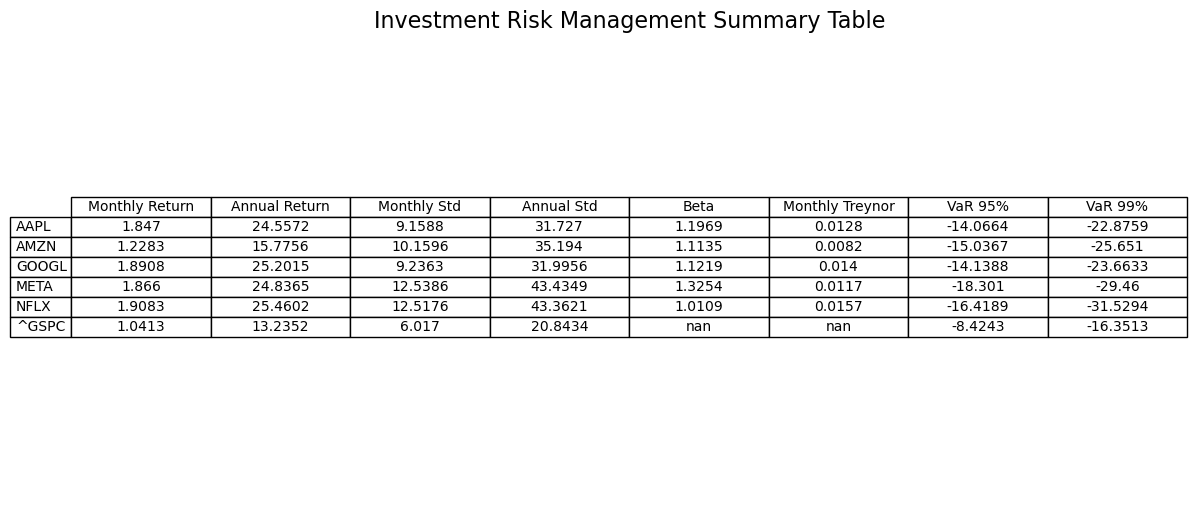

In [30]:
# Plot summary table
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary.values, colLabels=summary.columns, rowLabels=summary.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Investment Risk Management Summary Table', fontsize=16)
plt.show()

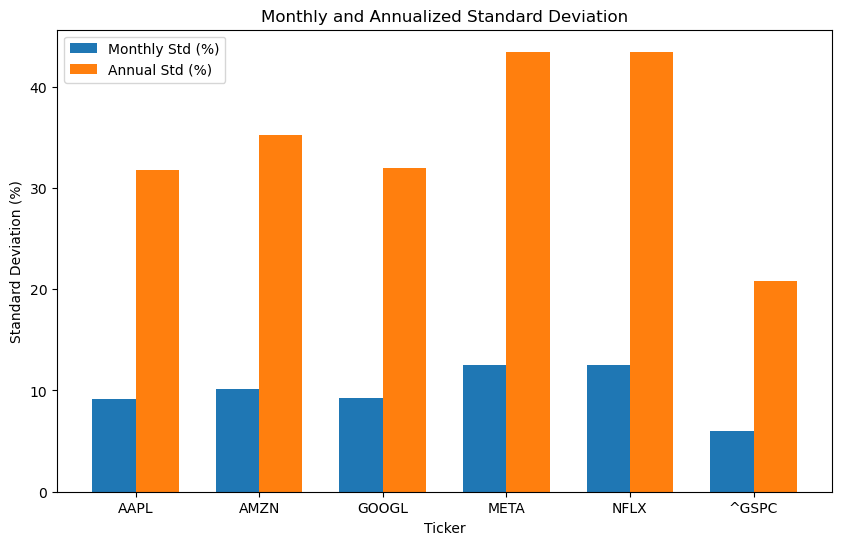

In [31]:
# Plot monthly standard deviation and annualized standard deviation
tickers = summary.index
monthly_std = summary['Monthly Std'] / 100  # Convert back to decimal for plotting
annual_std = summary['Annual Std'] / 100  # Convert back to decimal for plotting
plt.figure(figsize=(10, 6))
x = np.arange(len(tickers))
width = 0.35  # the width of the bars
plt.bar(x - width/2, monthly_std * 100, width, label='Monthly Std (%)')
plt.bar(x + width/2, annual_std * 100, width, label='Annual Std (%)')
plt.xlabel('Ticker')
plt.ylabel('Standard Deviation (%)')
plt.title('Monthly and Annualized Standard Deviation')
plt.xticks(x, tickers)
plt.legend()
plt.show()

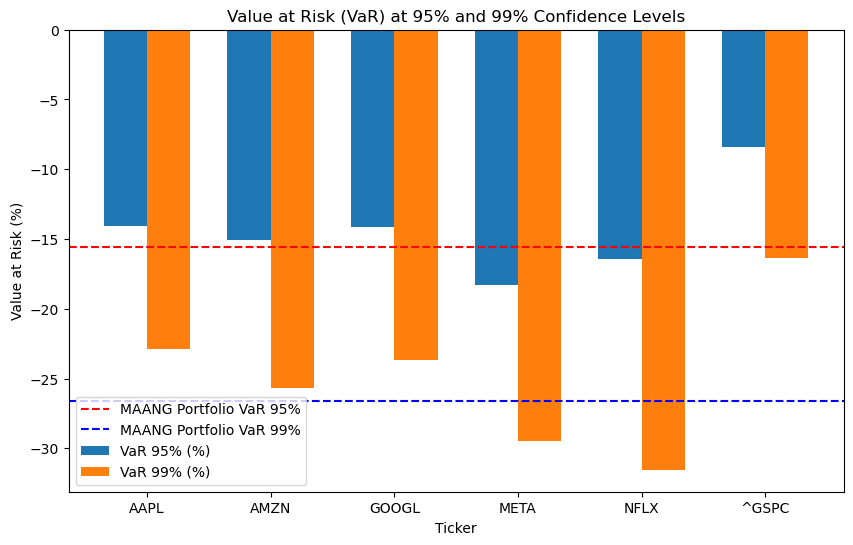

        VaR 95%  VaR 99%
Ticker                  
AAPL   -14.0664 -22.8759
AMZN   -15.0367 -25.6510
GOOGL  -14.1388 -23.6633
META   -18.3010 -29.4600
NFLX   -16.4189 -31.5294
^GSPC   -8.4243 -16.3513


In [34]:
# Plot of VaR 95% and VaR 99%
var_95 = summary['VaR 95%'] / 100  # Convert back to decimal for plotting
var_99 = summary['VaR 99%'] / 100  # Convert back to decimal for plotting
plt.figure(figsize=(10, 6))
x = np.arange(len(tickers))
width = 0.35  # the width of the bars
plt.bar(x - width/2, var_95 * 100, width, label='VaR 95% (%)')
plt.bar(x + width/2, var_99 * 100, width, label='VaR 99% (%)')
plt.axhline(portfolio_var_95 * 100, color='red', linestyle='--', label='MAANG Portfolio VaR 95%')
plt.axhline(portfolio_var_99 * 100, color='blue', linestyle='--', label='MAANG Portfolio VaR 99%')
plt.xlabel('Ticker')
plt.ylabel('Value at Risk (%)')
plt.title('Value at Risk (VaR) at 95% and 99% Confidence Levels')
plt.xticks(x, tickers)
plt.legend()
plt.show()
print(summary[['VaR 95%', 'VaR 99%']])